# Neural Network 101
In this example, we will go through the simplest form of a neural network model: a singel input, single output linear function. We expect to predict any used car price based on its mileage using this model.

The following contents will be covered:
1. How to construct a linear model.
2. How to evaluate a model (loss function).
3. How to compute gradient of the loss function.
4. How to update a model.

## Load Data
We will pick 10 samples from the [Used Car Dataset](https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data). Each sample contains mileage value and price value of a used car. We need to build a model based on these samples to predict any used car's price based on its mileage.

First, let's load the data as numpy arrays.

In [1]:
import numpy as np
mileage = np.array([5.8, 7.1, 1.9, 4.1, 12.8, 6.9, 2.9, 4.3, 1.7, 3.0])  # x10,000 miles
price = np.array([3.36, 2.26, 3.96, 3.10, 1.5, 2.8, 3.46, 3.5, 3.0, 3.8])  # x$10,000
print(f"shape of mileage array: {mileage.shape}, shape of price arrary: {price.shape}")  # check dimensions of the arrays

shape of mileage array: (10,), shape of price arrary: (10,)


## Visualize the Data
Use [matplotlib](https://matplotlib.org/). **Note**: `matplotlib` will auto scale the figure to better fill the space.

Text(0, 0.5, 'Price ($10,000)')

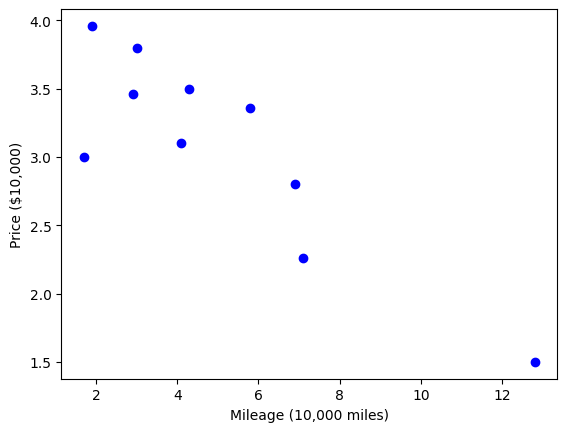

In [2]:
import matplotlib.pyplot as plt
plt.plot(mileage, price, 'bo')
plt.xlabel('Mileage (10,000 miles)')
plt.ylabel('Price ($10,000)')
# plt.savefig('mile_vs_price-10.png')

## Create an Initial Model
Create a linear model: $y=wx+b$. Initialize two parameters, $w=-1$ for the slope, $b=1$ for the y-axis intersection. **Note:** the figure's scale is different from above, especially on the vertical axis.

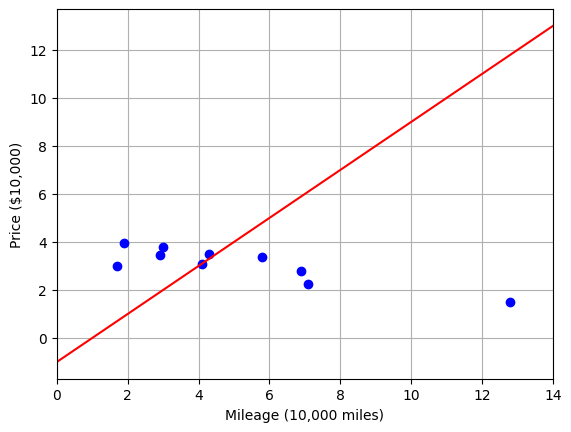

In [3]:
# Create model
def forward(weight, bias, independent_variable):
    dependent_variable = weight * independent_variable + bias
    return dependent_variable
# Visualize the model
w = 1.0
b = -1.0
X = np.linspace(0, 14, 10)  # create 10 evenly distributed independent variables 
yhat = forward(w, b, X)  # 10 dependent variables based on initial model
plt.plot(mileage, price, 'bo', X, yhat, 'r')  # plot scattered datapoints as well as the model line
plt.xlim(0., 14.)  # specify range of y axis
plt.xlabel('Mileage (10,000 miles)')
plt.ylabel('Price ($10,000)')
plt.grid()
# plt.savefig('init_model.png')

## Create Loss Function
Use Mean Square Error function to evaluate how bad the model was.

predicted prices: [ 4.8  6.1  0.9  3.1 11.8  5.9  1.9  3.3  0.7  2. ]
true prices: [3.36 2.26 3.96 3.1  1.5  2.8  3.46 3.5  3.   3.8 ]
mse loss: 7.6443200000000004
prediction - true: [ 1.4400000e+00  3.8400000e+00 -3.0600000e+00 -4.4408921e-16
  1.0300000e+01  3.1000000e+00 -1.5600000e+00 -2.0000000e-01
 -2.3000000e+00 -1.8000000e+00]


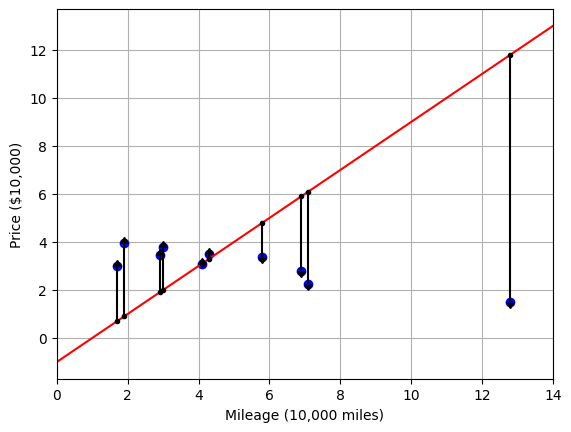

In [4]:
def mse_fn(yhat, y):  # mean square error function
    individual_error = 1 / 2 * (yhat - y) ** 2
    averaged_error = np.mean(individual_error)
    return averaged_error

# Evaluate initial model
pred = forward(w, b, mileage)
print(f"predicted prices: {pred}")
print(f"true prices: {price}")
loss = mse_fn(yhat=pred, y=price)
print(f"mse loss: {loss}")

# Plot errors
err = forward(w, b, mileage) - price
print(f"prediction - true: {err}")
plt.plot(mileage, price, 'bo', X, yhat, 'r')  # plot scattered datapoints as well as the model line
plt.errorbar(mileage, forward(w, b, mileage), yerr=abs(err), uplims=err>0, lolims=err<0, fmt='k.')
plt.xlim(0., 14.)  # specify range of y axis
plt.xlabel('Mileage (10,000 miles)')
plt.ylabel('Price ($10,000)')
plt.grid()
# plt.savefig('model_performance.png')

## Gradient Descent Optimization

In [5]:
def backward(yhat, y, X):
    dLdw = np.mean((yhat - y) * X)
    dLdb = np.mean(yhat - y)
    mse_loss = mse_fn(yhat, y)
    return dLdw, dLdb, mse_loss

# Optimization
num_iters = 400
learning_rate = 0.05
weights = [w]
biases = [b]
losses = []
for i in range(num_iters):
    pred = forward(w, b, mileage)
    dw, db, loss = backward(pred, price, mileage)
    w = w - dw * learning_rate
    b = b - db * learning_rate
    print(f"loss @ {i+1} iteration: {loss}")
    print(f"w={w}, b={b}")
    weights.append(w)
    biases.append(b)
    losses.append(loss)








loss @ 1 iteration: 7.6443200000000004
w=0.15830999999999995, b=-1.0488
loss @ 2 iteration: 6.201040967561549
w=0.8217212995, b=-0.8826332749999999
loss @ 3 iteration: 5.222675903150455
w=0.2665823907092748, b=-0.8922862393737498
loss @ 4 iteration: 4.5500486993008575
w=0.6984474671087122, b=-0.7612839810591543
loss @ 5 iteration: 4.078756820543122
w=0.33130016703549203, b=-0.7458777674511464
loss @ 6 iteration: 3.7403157783389305
w=0.6114168920711096, b=-0.6385371712550508
loss @ 7 iteration: 3.4897947322573515
w=0.3676290988802934, b=-0.6072930779402534
loss @ 8 iteration: 3.297708603051835
w=0.5483220127410631, b=-0.5160547715105148
loss @ 9 iteration: 3.144701364632266
w=0.3855093368505556, b=-0.4750033411521075
loss @ 10 iteration: 3.0180596328732077
w=0.5010875961201597, b=-0.39489428164926743
loss @ 11 iteration: 2.9094264594408403
w=0.39145449613769046, b=-0.3479741855871444
loss @ 12 iteration: 2.8133021522481916
w=0.46441385637344346, b=-0.275717736582554
loss @ 13 iteration:

## Observe the Progress

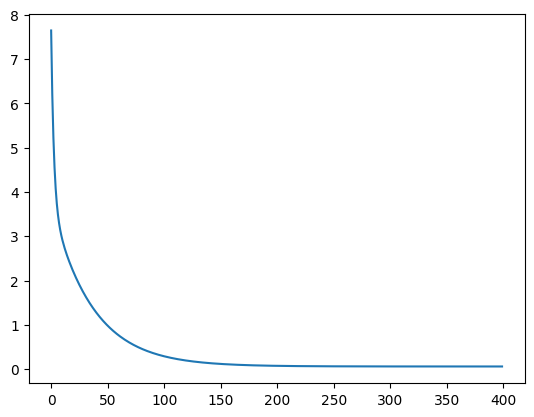

In [6]:
plt.plot(losses)

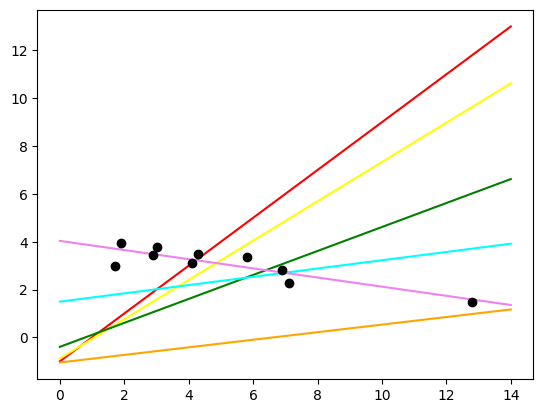

In [7]:
# Sample a few models
model_0 = yhat
model_1 = forward(weights[1], biases[1], X)
model_2 = forward(weights[2], biases[2], X)
model_10 = forward(weights[10], biases[10], X)
model_50 = forward(weights[50], biases[50], X)
final_model = forward(weights[-1], biases[-1], X)

# Plot models
plt.plot(X, model_0, 'red')
plt.plot(X, model_1, 'orange')
plt.plot(X, model_2, 'yellow')
plt.plot(X, model_10, 'green')
plt.plot(X, model_50, 'cyan')
plt.plot(X, final_model, 'violet')
plt.plot(mileage, price, 'ko')

